# Case Study: How Does a Bike-Share Navigate Speedy Success? (using R)

This is a case study for one of Google's Data Analytics Professional Certificate capstone projects. I've chosen R to complete this project.

# Case Background 
I've been assigned as a junior data analyst under marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
my team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve my recommendations, so they must be backed up with compelling data insights and professional data
visualizations.

# Business Background

**Business Model:**

*Product:* bike-sharing geotracked and network locked bikes across Chicago

*Customer types and revenue model:* members (annual subscribers) and casual riders (single-ride and full-day purchasers)


**Product Background:**
* 5,824 bicycles and 692 docking stations
* More than 50% of riders select traditional bikes
* 8% of riders opt for the assistive bike options
* 30% of users bike to commute to work each day
* Users are more likely to ride for leisure
* Casual riders have chosen Cyclistic for their mobility needs

# Team & Task

**Lily Moreno:** The director of marketing and manager. Moreno is responsible for the development of campaigns
and initiatives to promote the bike-share program. These may include email, social media, and other channels.

**● Cyclistic marketing analytics team:** A team of data analysts who are responsible for collecting, analyzing, and
reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy
learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic
achieve them.

**● Cyclistic executive team:** The notoriously detail-oriented executive team will decide whether to approve the
recommended marketing program.


The directior, Moreno has assigned me to answer How do annual members and casual riders use Cyclistic bikes
differently?
I will produce a report with the following deliverables:
1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis

#  Business task

Make an analysis and provide report based on riding data to help the marketing team achieve their goal converting casual customers into members in order to increase sales and revenue of the Cyclist. 

# Data Source and Quality Assessment 

Data Source: https://divvy-tripdata.s3.amazonaws.com/index.html Cyclistic is a fictional entity and Divvy's open data is used for the purpose of this case study. We'll be examining a period of 12 months, from January 2022 to December 2022. This data is made available by Motivate International Inc. under this license: https://ride.divvybikes.com/data-license-agreement

Reliable: Negative. Datasets have missing values, negative calculations and contain duplicate values. 

Original: Positive.

Comprehensiveness: Positive.

Current: Positive.

Cited: Positive.




#  PREPARING & CLEANING THE DATA 

In [ ]:
# Load Packages
library(tidyverse)
library(readr)
library(dplyr)
library(lubridate)
library(skimr)
library(janitor)
library(ggplot2)
library(lubridate)


In [2]:
#Loading dataset
divvy_1 <- read.csv("/kaggle/input/cyclist-datasets-remote-2022/202201-divvy-tripdata/202201-divvy-tripdata.csv")
divvy_2 <- read.csv("/kaggle/input/cyclist-datasets-remote-2022/202202-divvy-tripdata/202202-divvy-tripdata.csv")
divvy_3 <- read.csv("/kaggle/input/cyclist-datasets-remote-2022/202203-divvy-tripdata/202203-divvy-tripdata.csv")
divvy_4 <- read.csv("/kaggle/input/cyclist-datasets-remote-2022/202204-divvy-tripdata/202204-divvy-tripdata.csv")
divvy_5 <- read.csv("/kaggle/input/cyclist-datasets-remote-2022/202205-divvy-tripdata/202205-divvy-tripdata.csv")
divvy_6 <- read.csv("/kaggle/input/cyclist-datasets-remote-2022/202206-divvy-tripdata/202206-divvy-tripdata.csv")
divvy_7 <- read.csv("/kaggle/input/cyclist-datasets-remote-2022/202207-divvy-tripdata/202207-divvy-tripdata.csv")
divvy_8 <- read.csv("/kaggle/input/cyclist-datasets-remote-2022/202208-divvy-tripdata/202208-divvy-tripdata.csv")
divvy_9 <- read.csv("/kaggle/input/cyclist-datasets-remote-2022/202209-divvy-tripdata/202209-divvy-publictripdata.csv")
divvy_10 <- read.csv("/kaggle/input/cyclist-datasets-remote-2022/202210-divvy-tripdata/202210-divvy-tripdata.csv")
divvy_11 <- read.csv("/kaggle/input/cyclist-datasets-remote-2022/202211-divvy-tripdata/202211-divvy-tripdata.csv")
divvy_12 <- read.csv("/kaggle/input/cyclist-datasets-remote-2022/202212-divvy-tripdata/202212-divvy-tripdata.csv")

In [3]:
str(divvy_1)
str(divvy_2)
str(divvy_3)
str(divvy_4)
str(divvy_5)
str(divvy_6)
str(divvy_7)
str(divvy_8)
str(divvy_9)
str(divvy_10)
str(divvy_11)
str(divvy_12)


'data.frame':	103770 obs. of  13 variables:
 $ ride_id           : chr  "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-01-13 11:59:47" "2022-01-10 08:41:56" "2022-01-25 04:53:40" "2022-01-04 00:18:04" ...
 $ ended_at          : chr  "2022-01-13 12:02:44" "2022-01-10 08:46:17" "2022-01-25 04:58:01" "2022-01-04 00:33:00" ...
 $ start_station_name: chr  "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr  "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr  "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num  42 42 41.9 42 41.9 ...
 $ start_lng         : num

> 13 different variables from 12 datasets have similar formats. We can proceed to merge the datasets.* 

In [4]:
bike_rides <- rbind(divvy_1, divvy_2, divvy_3, divvy_4, divvy_5,divvy_6, divvy_7, divvy_8, divvy_9, divvy_10, divvy_11, divvy_12)

In [5]:
bike_rides <- bike_rides[!duplicated(bike_rides$ride_id), ]
print(paste("Removed", nrow(bike_rides) - nrow(bike_rides), "duplicated rows"))

[1] "Removed 0 duplicated rows"


In [6]:
#dropping NA cells
bike_rides <- na.omit(bike_rides)


In [7]:
summary(bike_rides)

   ride_id          rideable_type       started_at          ended_at        
 Length:5661859     Length:5661859     Length:5661859     Length:5661859    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5661859     Length:5661859     Length:5661859     Length:5661859    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

In [8]:
# converting to date time format,

bike_rides$Ymd  <- as.Date(bike_rides$started_at)

#added columns for looking into the date of the travel,start and end hour.

bike_rides$started_at <- lubridate::ymd_hms(bike_rides$started_at)
bike_rides$ended_at <- lubridate::ymd_hms(bike_rides$ended_at)

bike_rides$start_hour <- lubridate::hour(bike_rides$started_at)
bike_rides$end_hour <- lubridate::hour(bike_rides$ended_at)



In [9]:
bike_rides$ride_length <- as.numeric(bike_rides$ended_at - bike_rides$started_at) / 60

In [10]:
summary(bike_rides$ride_length)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-10353.35      5.82     10.27     16.33     18.42  34354.07 

In [11]:
bike_rides <- bike_rides %>% filter(ride_length > 0) #filtered out negative values

In [12]:
bike_rides$day_of_week <- format (as.Date(bike_rides$Ymd), "%A") #to know the day and month of the ride to analys weekly and monthly usage of bikes
bike_rides$month <- strftime(bike_rides$started_at, "%B")

In [13]:
head(bike_rides)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ymd,start_hour,end_hour,ride_length,day_of_week,month
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<int>,<int>,<dbl>,<chr>,<chr>
1,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,2022-01-13,11,12,2.950000,Thursday,January
2,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,2022-01-10,8,8,4.350000,Monday,January
3,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,2022-01-25,4,4,4.350000,Tuesday,January
4,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,2022-01-04,0,0,14.933333,Tuesday,January
5,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,2022-01-20,1,1,6.033333,Thursday,January
6,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,2022-01-11,18,18,3.366667,Tuesday,January


In [14]:
bike_rides$ride_distance <- distGeo(matrix(c(bike_rides$start_lng, bike_rides$start_lat), ncol = 2), matrix(c(bike_rides$end_lng, bike_rides$end_lat), ncol = 2))
bike_rides$ride_distance <- bike_rides$ride_distance/1000

In [15]:
head(bike_rides)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ymd,start_hour,end_hour,ride_length,day_of_week,month,ride_distance
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>
1,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,2022-01-13,11,12,2.950000,Thursday,January,0.7013791
2,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,2022-01-10,8,8,4.350000,Monday,January,0.6961414
3,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,2022-01-25,4,4,4.350000,Tuesday,January,1.0034507
4,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,2022-01-04,0,0,14.933333,Tuesday,January,2.4601250
5,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,2022-01-20,1,1,6.033333,Thursday,January,0.8140730
6,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,2022-01-11,18,18,3.366667,Tuesday,January,0.8456658


In [16]:
str(bike_rides)

'data.frame':	5661328 obs. of  20 variables:
 $ ride_id           : chr  "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct, format: "2022-01-13 11:59:47" "2022-01-10 08:41:56" ...
 $ ended_at          : POSIXct, format: "2022-01-13 12:02:44" "2022-01-10 08:46:17" ...
 $ start_station_name: chr  "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr  "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr  "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num  42 42 41.9 42 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.6 ...
 $ end_lat           : num 

#  ANALYZING THE DATA

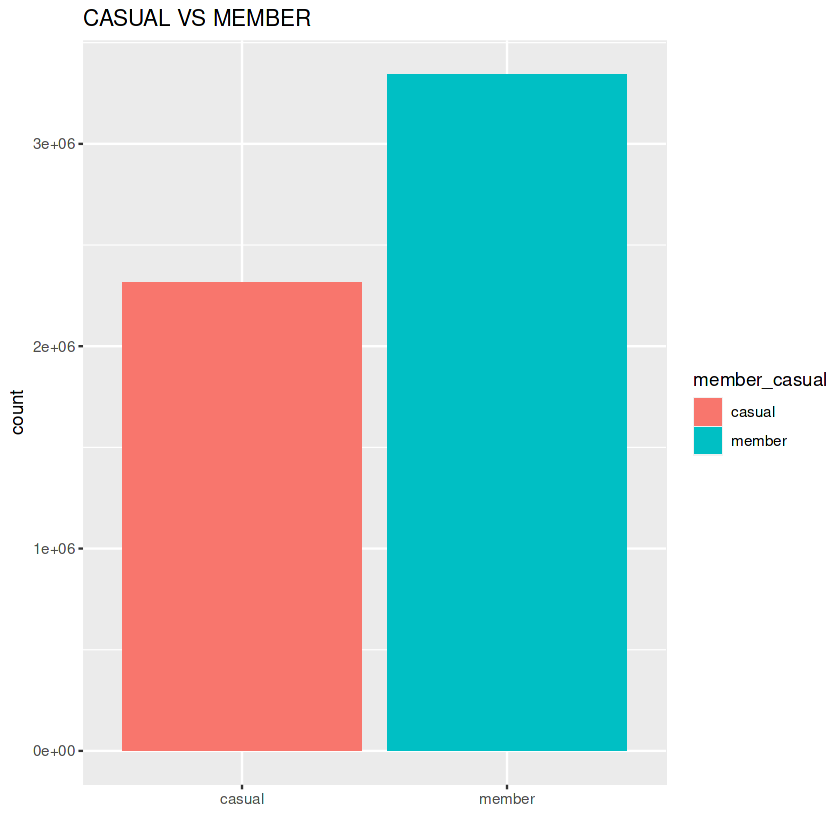

In [17]:
ggplot(bike_rides, aes(member_casual, fill=member_casual)) +
      geom_bar() +
      labs(x="", title="CASUAL VS MEMBER")



In [18]:
bike_rides %>% group_by(member_casual) %>% summarise(count = length(ride_id))

member_casual,count
<chr>,<int>
casual,2316600
member,3344728


**Members are dominating the Cyclist App**



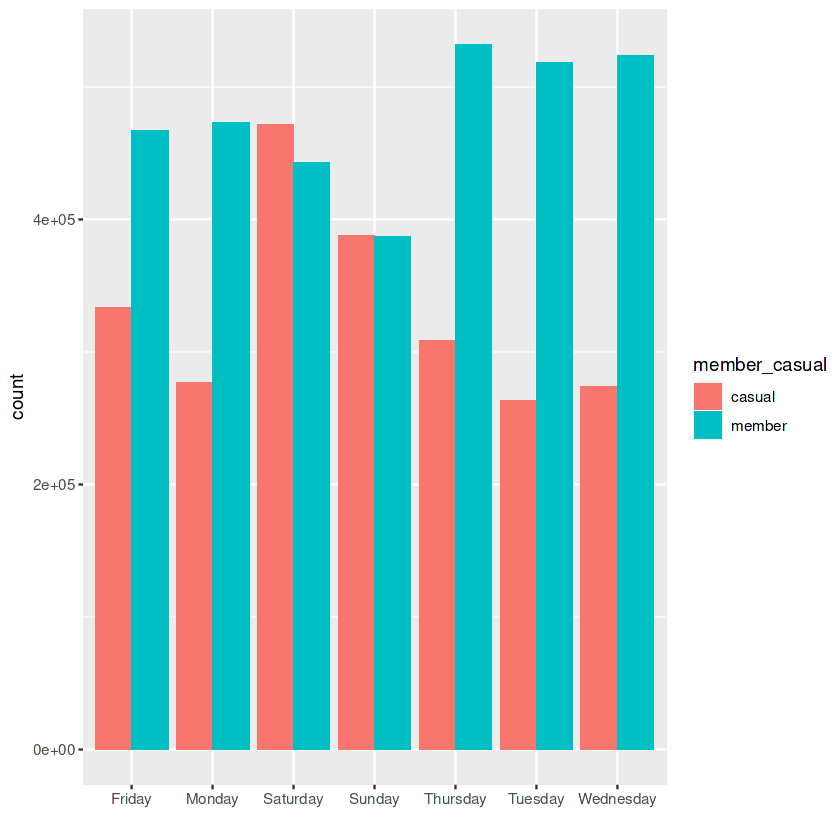

In [19]:
ggplot(bike_rides, aes(day_of_week, fill=member_casual)) +
     geom_bar(,position=position_dodge()) +
     labs(x="", tle="WEEKLY RIDES")

**WEELY ANALYSIS**
> The data says that casual riders are likely to take rides on Saturday & Sunday. On the other hand, members are less likely to take rides on Sunday than other weekdays. 


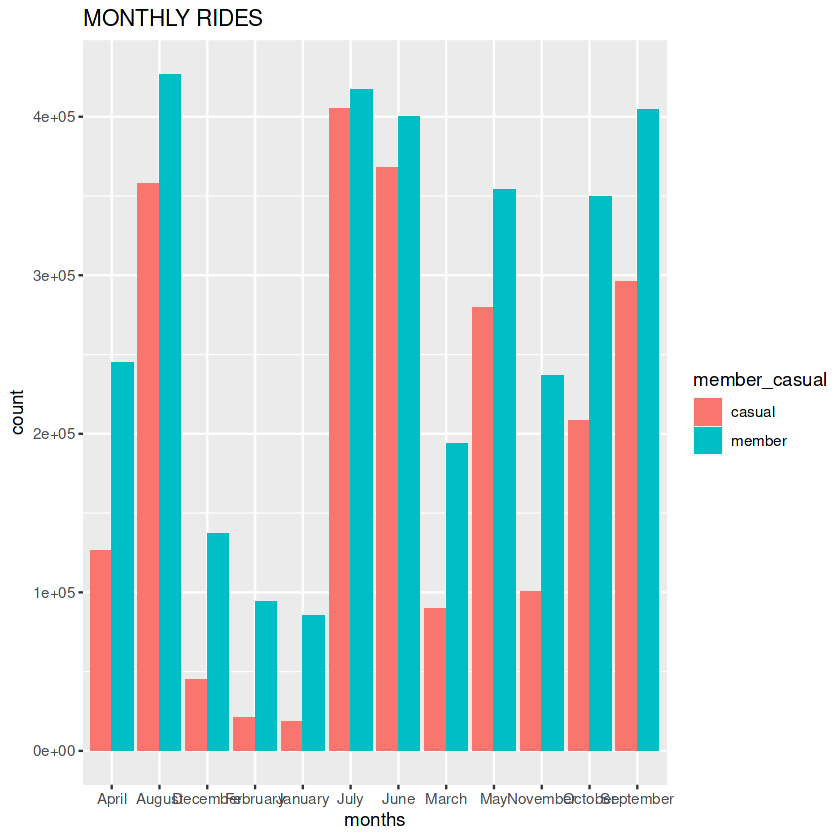

In [20]:

ggplot(bike_rides, aes(month, fill=member_casual)) +
    geom_bar(,position=position_dodge()) +
    labs(x="months", title="MONTHLY RIDES")

> Visualization looks awful. We also need to order the weeks to order the months

In [21]:
bike_rides$day_of_week <- ordered(bike_rides$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

bike_rides$month <- ordered(bike_rides$month, levels=c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"))

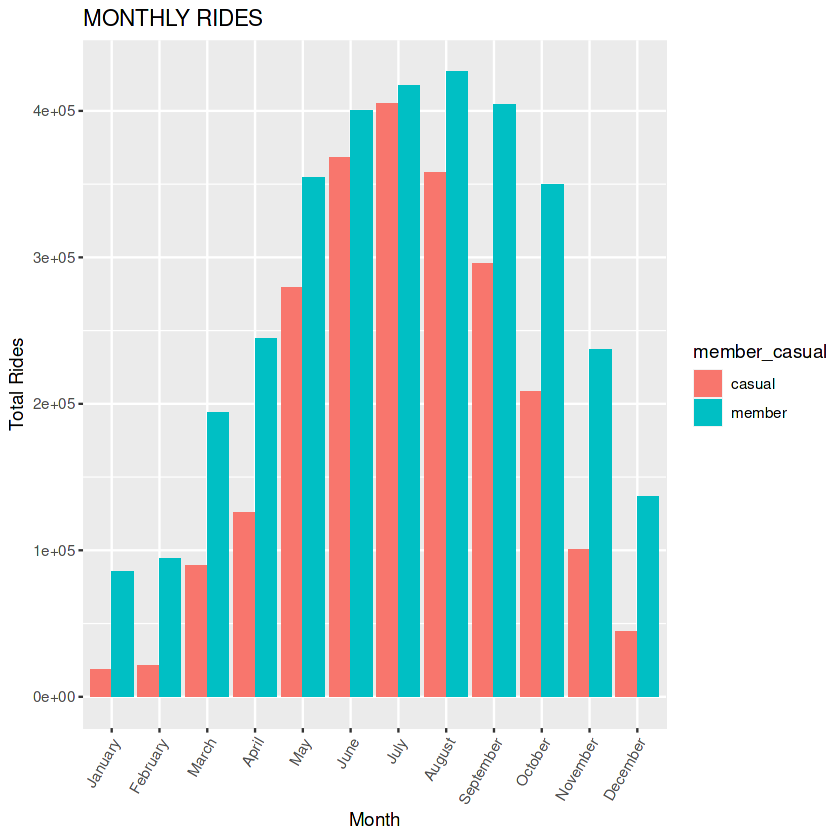

In [22]:

ggplot(bike_rides, aes(month, fill=member_casual)) +
    geom_bar(,position=position_dodge()) +
    labs(x="Month",y="Total Rides", title="MONTHLY RIDES") +
  theme(axis.text.x = element_text(angle = 60, hjust = 1))

**MONTHLY ANALYSIS**

> Both Casual and Member riders are taking most rides from May to October.  Riders are less active rest of the year. **

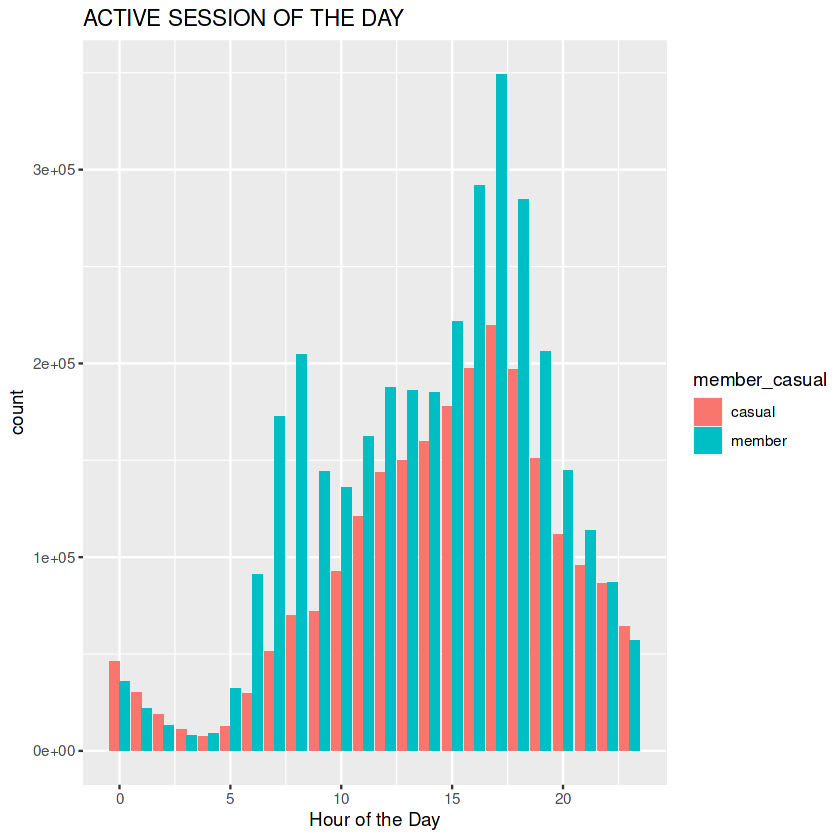

In [23]:
bike_rides %>%
    ggplot(aes(start_hour, fill=member_casual)) +
    labs(x="Hour of the Day", title="ACTIVE SESSION OF THE DAY") +
    geom_bar(position=position_dodge())

**DAILY ANALYSIS**

> Members are usually started to get active during early morning where casuals are expected to be active during middle of the day. Both riders are most active during evening.

# Monthly and Weekly ride distribution

In [24]:
member_rides <-  filter(bike_rides, member_casual == "member")

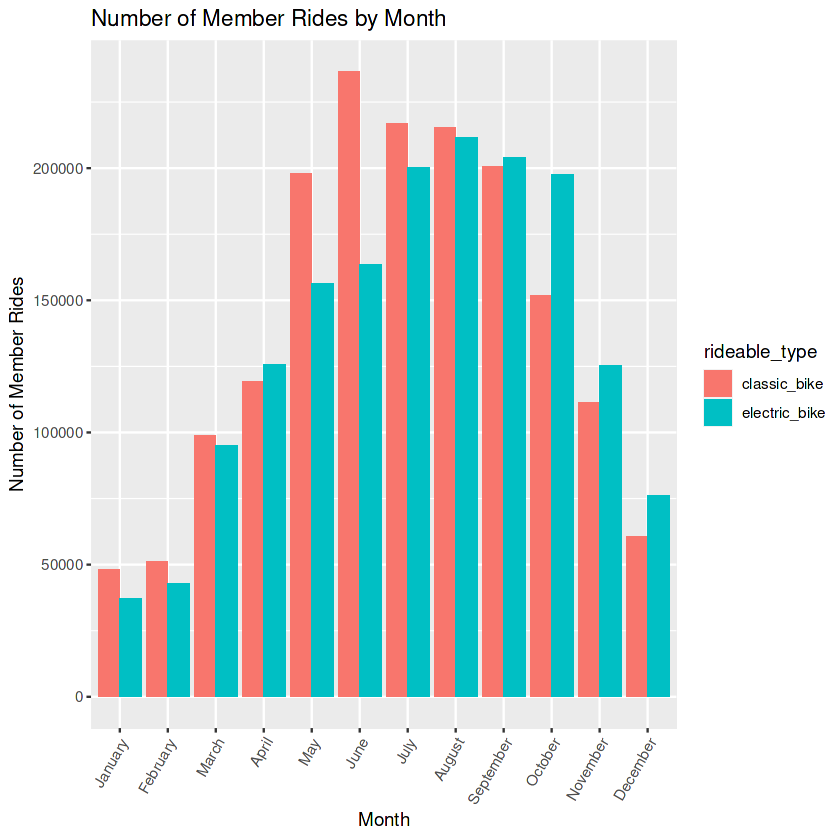

In [25]:
member_rides %>% group_by(rideable_type, month) %>%  
    ggplot(aes(month, fill=rideable_type)) +  geom_bar(position=position_dodge()) +
    labs(title="Number of Member Rides by Month", x = "Month", y = "Number of Member Rides") + theme(axis.text.x = element_text(angle = 60, hjust = 1))
   

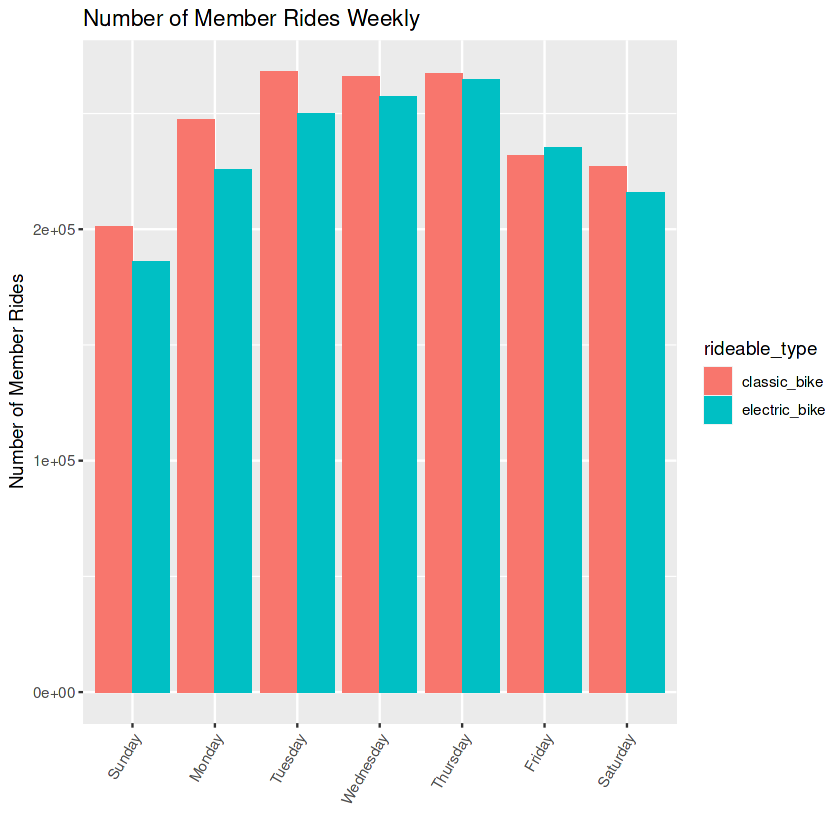

In [26]:
member_rides %>% group_by(rideable_type, day_of_week) %>%  
    ggplot(aes(day_of_week, fill=rideable_type)) +  geom_bar(position=position_dodge()) +
    labs(title="Number of Member Rides Weekly", x = "", y = "Number of Member Rides") + theme(axis.text.x = element_text(angle = 60, hjust = 1))
   

> Members prefer riding both classic and electric bike but classic bikes are more used. 

In [27]:
casual_rides <-  filter(bike_rides, member_casual == "casual")

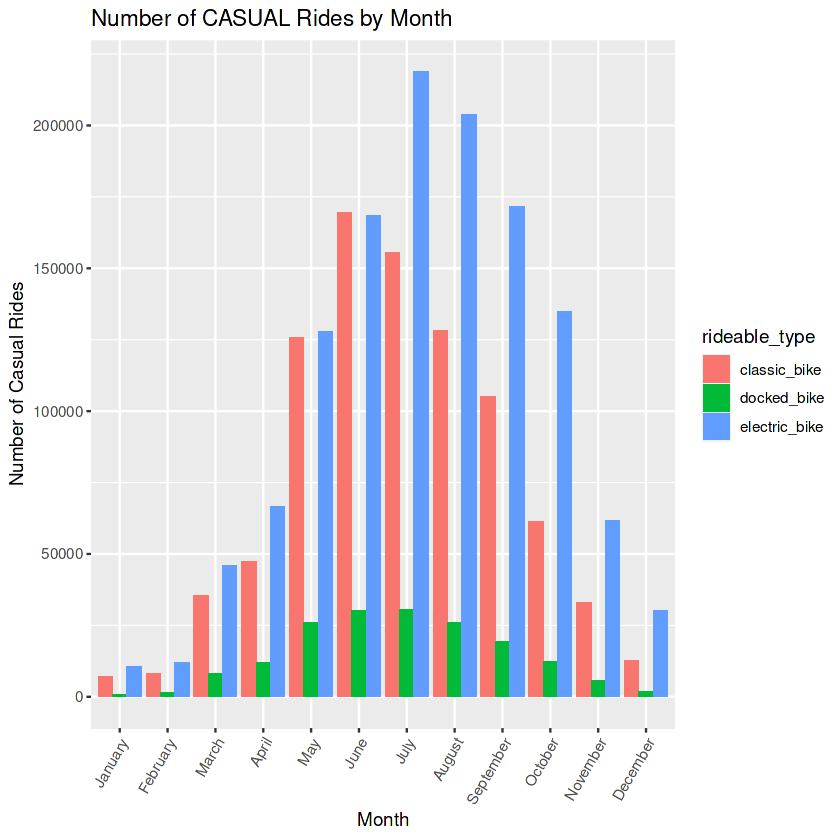

In [28]:
casual_rides %>% group_by(rideable_type, month) %>%  
    ggplot(aes(month, fill=rideable_type)) +  geom_bar(position=position_dodge()) +
    labs(title="Number of CASUAL Rides by Month", x = "Month", y = "Number of Casual Rides") + theme(axis.text.x = element_text(angle = 60, hjust = 1))
   

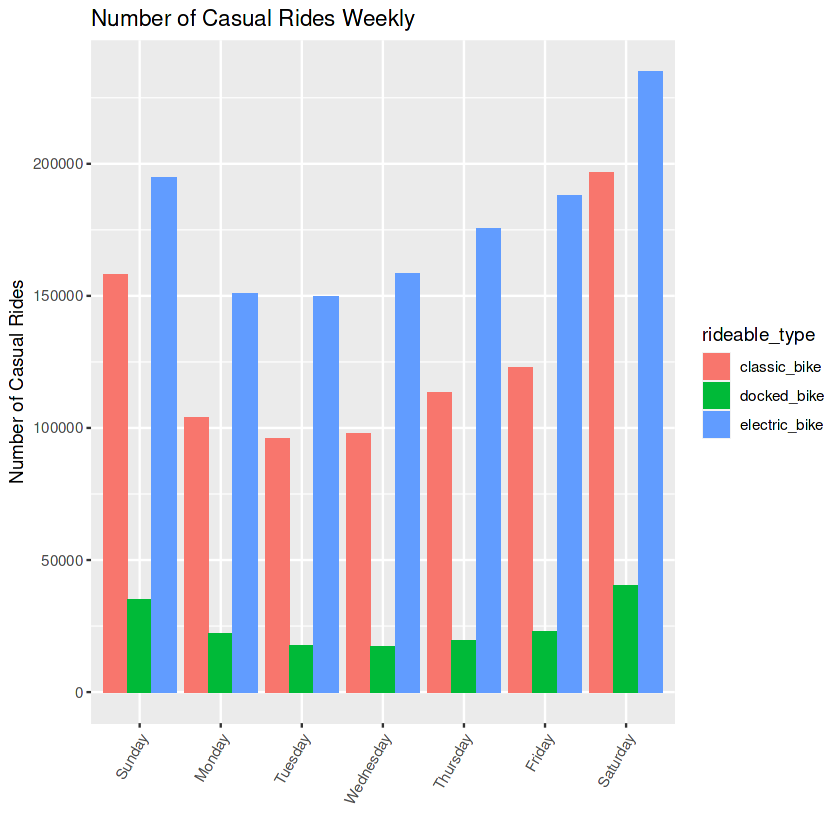

In [29]:
casual_rides %>% group_by(rideable_type, day_of_week) %>%  
    ggplot(aes(day_of_week, fill=rideable_type)) +  geom_bar(position=position_dodge()) +
    labs(title="Number of Casual Rides Weekly", x = "", y = "Number of Casual Rides") + theme(axis.text.x = element_text(angle = 60, hjust = 1))
   

Casual riders using both electric and classic bikes far more than docked bikes. The usage of electric and classic bikes is identical but from the month of June there is a peak rise of electrice bikes. 

#  Analysis on Ride Length (Minutes)

In [30]:

mean(bike_rides$ride_length) #straight average 
median(bike_rides$ride_length) #midpoint number in the ascending array of ride lengths
max(bike_rides$ride_length) #longest ride
min(bike_rides$ride_length) #shortest ride


summary(bike_rides$ride_length)

[1] 16.3314

[1] 10.26667

[1] 34354.07

[1] 0.01666667

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.02     5.82    10.27    16.33    18.42 34354.07 

In [31]:
# Compare members and casual users
bike_rides %>% 
  group_by(member_casual) %>% 
  summarise(avg_lenth = mean(ride_length), median_length = median(ride_length), max_length = max(ride_length), min_length = min(ride_length))

member_casual,avg_lenth,median_length,max_length,min_length
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,21.98914,12.966667,34354.067,0.01666667
member,12.41278,8.833333,1499.933,0.01666667


In [32]:
aggregate(bike_rides$ride_length ~ bike_rides$member_casual + bike_rides$day_of_week, FUN = mean)

bike_rides$member_casual,bike_rides$day_of_week,bike_rides$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,25.09556
member,Sunday,13.69357
casual,Monday,22.63058
member,Monday,12.00569
casual,Tuesday,19.63362
member,Tuesday,11.81177
casual,Wednesday,19.00189
member,Wednesday,11.83523
casual,Thursday,19.67659


# Popular Stations 

In [33]:
head(bike_rides)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ymd,start_hour,end_hour,ride_length,day_of_week,month,ride_distance
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<int>,<int>,<dbl>,<ord>,<ord>,<dbl>
1,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,2022-01-13,11,12,2.950000,Thursday,January,0.7013791
2,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,2022-01-10,8,8,4.350000,Monday,January,0.6961414
3,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,2022-01-25,4,4,4.350000,Tuesday,January,1.0034507
4,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,2022-01-04,0,0,14.933333,Tuesday,January,2.4601250
5,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,2022-01-20,1,1,6.033333,Thursday,January,0.8140730
6,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,2022-01-11,18,18,3.366667,Tuesday,January,0.8456658


In [34]:
#Create a new column with route on the casual riders data frame

casual_rides <- casual_rides %>%
  mutate(route = paste(start_station_name, "To", sep=" "))
         
         
casual_rides <- casual_rides %>%       
  mutate(route = paste(route, end_station_name, sep =" "))

In [35]:
#Find the most popular route by number of casual rides

popular_routes <- casual_rides %>% 
  group_by(route) %>%
  summarise(number_of_rides  = n(), average_duration_minutes = mean(ride_length)) %>% 
  arrange(route, number_of_rides, average_duration_minutes)

route_top10 <- arrange(popular_routes, desc(number_of_rides))



In [36]:
head(route_top10, 10)

route,number_of_rides,average_duration_minutes
<chr>,<int>,<dbl>
To,192449,13.99214
Streeter Dr & Grand Ave To Streeter Dr & Grand Ave,10625,40.68252
DuSable Lake Shore Dr & Monroe St To DuSable Lake Shore Dr & Monroe St,6614,34.52006
DuSable Lake Shore Dr & Monroe St To Streeter Dr & Grand Ave,5100,27.88582
Michigan Ave & Oak St To Michigan Ave & Oak St,4611,45.13307
Millennium Park To Millennium Park,4058,37.69110
Montrose Harbor To Montrose Harbor,2938,49.57518
Streeter Dr & Grand Ave To DuSable Lake Shore Dr & Monroe St,2854,28.19879
Streeter Dr & Grand Ave To,2790,28.05204


# FINAL REPORT

1. The average ride length  of members is only 12 minutes wherecasual riders ride 22 minutes on average which is 83.33% higher than members. Therefore, there are great potential to turn casual riders into members.






2. The best period to run campaigns, promotions and advirtisements from May to October. Because most rides are taken by riders during this period. 

3.Top 5 places to run marketing campaigns:
* "Streeter Dr & Grand Ave" 
* "DuSable Lake Shore Dr & Monroe St"  
* "Michigan Ave & Oak St"
* "Millennium Park"
* "Montrose Harbor"

4. Casual riders like to ride on weekends (Saturday, Sunday). On the other hand, members are less like to ride on those two days. Both casual and members is mostly active during evening. Therefore, casual riders who are active except weekends could buy membership.

5. Casual riders like to ride electric bikes more than others from July to December. Feb to June the usage of electirc and classic are almost same. 